<a href="https://colab.research.google.com/github/mardom/astrostatistics-2020/blob/main/Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=MYvAZ8DBBgU

https://drive.google.com/file/d/1houfOJ66iy8y72SPMRTJ4l1yRylF79-I/view

# Support Vector Machines
Now let us look at yet another way of choosing a linear decision boundary, which leads off in an entirely different direction, that of support vector machines.

Consider finding the hyperplane that maximizes the distance of the closest point
from either class. We call this distance the margin. Points on the margin are called support vectors. Let us begin by assuming the classes are linearly separable. Here we will use $y ∈ {−1, 1}$, as it will make things notationally cleaner.



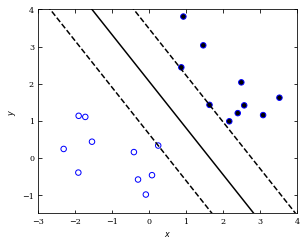

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Create the data
np.random.seed(1)

N1 = 10
N2 = 10
mu1 = np.array([0, 0])
mu2 = np.array([2.0, 2.0])

Cov1 = np.array([[1, -0.5],
                [-0.5, 1]])
Cov2 = Cov1

X = np.vstack([np.random.multivariate_normal(mu1, Cov1, N1),
               np.random.multivariate_normal(mu2, Cov2, N2)])
y = np.hstack([np.zeros(N1), np.ones(N2)])

#------------------------------------------------------------
# Perform an SVM classification
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

xx = np.linspace(-5, 5)
w = clf.coef_[0]
m = -w[0] / w[1]
b = - clf.intercept_[0] / w[1]
yy = m * xx + b

#------------------------------------------------------------
# find support vectors
i1 = np.argmax(np.dot(X[:N1], w))
i2 = N1 + np.argmin(np.dot(X[N1:], w))

db1 = X[i1, 1] - (m * X[i1, 0] + b)
db2 = X[i2, 1] - (m * X[i2, 0] + b)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111, aspect='equal')

ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.binary)
ax.plot(xx, yy, '-k')
ax.plot(xx, yy + db1, '--k')
ax.plot(xx, yy + db2, '--k')

ax.set_ylim(-1.5, 4)
ax.set_xlim(-3, 4)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

The hyperplane which maximizes the margin is given by finding

$$max_{\beta, \beta_0}(m),\ \rm{subject\ to}\\ \frac{y_i \beta_0+\beta^T x_i)}{|\beta|} \geq m\ \forall i$$

we can arbitrarily set $|\beta|= 1/m$.
Thus the optimization problem is equivalent to minimizing $|\beta|/2$:

$$\rm{subject\ to}\ y_i \beta_0+\beta^T x_i \geq 1,\ \forall i$$

It turns out this optimization problem is a quadratic programming problem (quadratic objective function with linear constraints), a standard type of optimization problem for which methods exist for finding the global optimum. The theory of convex optimization tells us there is an equivalent way to write this optimization
problem (its dual formulation).

Let $$g^∗ (x)$$ denote the optimal (maximum margin) hyperplane. Let $< x_i , x_i' >$
denote the inner product of $x_i$ and $x_i'$. Then 

$$\beta_j^*=\sum_{i=1}^N \alpha_i y_i x_{ij}$$ where $\alpha$ is the vector of weights that maximizes

$$\sum_{i=1}^{N} \alpha_i-\frac{1}{2}\sum_{i=1}^{N}\sum_{i'=1}^{N}\alpha_i \alpha_{i'}y_i y_{y'} <x_i,x_{i}>$$

For realistic problems, however, we must relax the assumption that the classes
are linearly separable. In the primal formulation, instead of minimizing:

$$\frac{|\beta|}{2},\ \rm{subject\ to}\\ y_i \beta_0+\beta^T x_i \geq 1\ \forall i$$

we will now minimize

$$\frac{|\beta|}{2},\ \rm{subject\ to}\\ y_i \beta_0+\beta^T x_i \geq 1-\xi_i\ \forall i$$

where the $\xi_i$ are called slack variables and we limit the amount of slack by adding the
constraints

$$\xi_ \geq 0,\ and\ \sum_i \xi_i \leq C$$

This effectively bounds the total number of misclassifications at C, which
becomes a tuning parameter of the support vector machine. The points $x_i$ for which
$\alpha_i \neq 0$ are the support vectors.
The discriminant function can be rewritten as

$$$g(x) = \beta_0+\sum_{i=1}^{N} \alpha_i y_i <x, x_i>$$

and the final classification rule is $\hat{c}=sgn(g(x))$. 






downloading cross-matched SDSS/2MASS dataset from https://github.com/astroML/astroML-data/raw/master/datasets/stripe82calibStars_v2.6.dat.gz to /root/astroML_data

uncompressing file...
@pickle_results: computing results and saving to 'SVM_rrlyrae.pkl'
completeness [0.99270073 1.         1.         1.        ]
contamination [0.90014684 0.85347594 0.85347594 0.85471898]


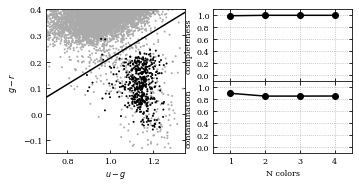

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results

# SVM takes several minutes to run, and is order[N^2]
#  truncating the dataset can be useful for experimentation.
#X = X[::5]
#y = y[::5]

(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# Fit SVM
Ncolors = np.arange(1, X.shape[1] + 1)


@pickle_results('SVM_rrlyrae.pkl')
def compute_SVM(Ncolors):
    classifiers = []
    predictions = []

    for nc in Ncolors:
        # perform support vector classification
        clf = SVC(kernel='linear', class_weight='balanced')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions

classifiers, predictions = compute_SVM(Ncolors)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# compute the decision boundary
clf = classifiers[1]
w = clf.coef_[0]
a = -w[0] / w[1]
yy = np.linspace(-0.1, 0.4)
xx = a * yy - clf.intercept_[0] / w[1]

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
ax.plot(xx, yy, '-k')
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

ax.set_xlim(0.7, 1.35)
ax.set_ylim(-0.15, 0.4)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

One major limitation of SVM is that it is limited to linear decision boundaries.
The idea of kernelization is a simple but powerful way to take a support vector
machine and make it nonlinear—in the dual formulation, one simply replaces each
occurrence of $x_i$ , $x_{i'}$ with a kernel function $K (x_i , x_{i'})$ with certain properties which
allow one to think of the SVM as operating in a higher-dimensional space. One such
kernel is the Gaussian kernel

$$K(x_i, x_{i'})=exp(-\gamma|x_i-x_{i'}|^2)$$

where $\gamma$ is a parameter to be learned via cross-validation. This nonlinear classification
improves over the linear version only slightly. For this particular data set, the
contamination is not driven by nonlinear effects.

@pickle_results: computing results and saving to 'kernelSVM_rrlyrae.pkl'
completeness [1. 1. 1. 1.]
contamination [0.90108303 0.83901293 0.83573141 0.81561238]


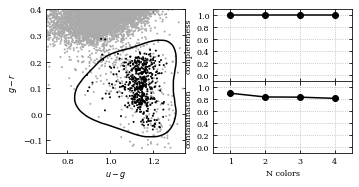

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn import metrics

from astroML.datasets import fetch_rrlyrae_mags
from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # re-order the colors for better 1-color results

# SVM takes several minutes to run, and is order[N^2]
#  truncating the dataset can be useful for experimentation.
#X = X[::5]
#y = y[::5]

(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# Fit Kernel SVM
Ncolors = np.arange(1, X.shape[1] + 1)


@pickle_results('kernelSVM_rrlyrae.pkl')
def compute_SVM(Ncolors):
    classifiers = []
    predictions = []

    for nc in Ncolors:
        # perform support vector classification
        clf = SVC(kernel='rbf', gamma=20.0, class_weight='balanced')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions

classifiers, predictions = compute_SVM(Ncolors)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 101),
                     np.linspace(ylim[0], ylim[1], 101))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

# smooth the boundary
from scipy.ndimage import gaussian_filter
Z = gaussian_filter(Z, 2)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

# Decision Trees
The decision boundaries  can be applied hierarchically to a data set. This observation leads to a powerful methodology for classification that is known as the decision tree. An example decision tree used for the classification of our RR Lyrae stars is shown below.
.
The top node of the decision tree contains the entire data set. At each branch
of the tree these data are subdivided into two child nodes (or subsets), based on a
predefined decision boundary, with one node containing data below the decision
boundary and the other node containing data above the decision boundary. The
boundaries themselves are usually axis aligned (i.e., the data are split along one
feature at each level of the tree). This splitting process repeats, recursively, until we
achieve a predefined stopping criteria.


----------------------------------------------------------------
partial training set: (69509 non-variable, 346 RR Lyrae)
positive = RR Lyrae, negative = non-variable
false positives: 52 (41.9%)
false negatives: 65 (0.3%)
----------------------------------------------------------------
full training set: (69509 non-variables, 346 RR Lyraes)
positive = RR Lyrae, negative = non-variables
false positives: 52 (41.9%)
false negatives: 65 (0.3%)


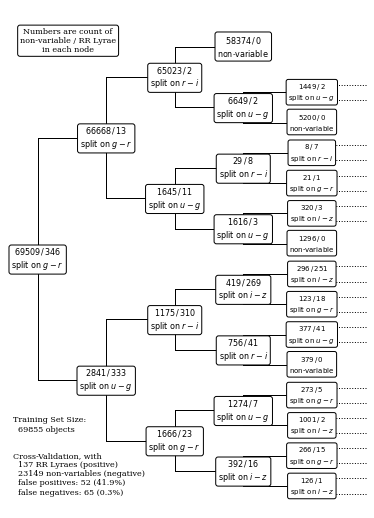

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

# % sign needs to be escaped if usetex is True
import matplotlib
if matplotlib.rcParams.get('text.usetex'):
    pct = r'\%'
else:
    pct = '%'


def get_x_position(level, n_levels, xmin=0.01, xmax=1):
    dx = (xmax - xmin) / (n_levels - 1.)
    return xmin + level * dx


def get_y_position(level, j, ymin=0, ymax=1):
    n = 2 ** level
    dy = (ymax - ymin) * 1. / n
    return ymin + (j + 0.5) * dy


def draw_connections(x_positions, y_positions, children, i,
                     ax, linestyle='-k'):
    for (c, y) in zip(children, y_positions):
        if c == -1:
            continue
        ax.plot(x_positions[i - 1:i + 1], [y, y], linestyle, lw=1)

    for j in range(0, 2 ** i, 2):
        if children[j] == -1 or children[j + 1] == -1:
            continue
        ax.plot(2 * [x_positions[i - 1]], y_positions[j:j + 2],
                linestyle, lw=1)


def visualize_tree(T, data, classes, labels=None, levels=5,
                   ymin=0, ymax=1, xmin=0, xmax=1, ax=None):
    # to visualize the tree, we essentially need to re-build it: it doesn't
    # store the list of points at each node.
    if ax is None:
        ax = plt.gca()

    # get tree aspects
    try:
        # new versions of sklearn
        T_children = T.tree_.children
    except:
        # old versions of sklearn
        T_children = np.vstack([T.tree_.children_left,
                                T.tree_.children_right]).T
    try:
        # version < 0.14
        T_nsamples = T.tree_.n_samples
    except AttributeError:
        # version 0.14+
        T_nsamples = T.tree_.n_node_samples

    T_feature = T.tree_.feature
    T_threshold = T.tree_.threshold

    x_positions = get_x_position(np.arange(levels + 1), levels)
    node_list = np.array([0])
    new_data_masks = [np.ones(data.shape[0], dtype=bool)]

    for i in range(levels):
        y_positions = get_y_position(i, np.arange(2 ** i))

        mask = (node_list != -1)

        # plot the positions of the nodes
        ax.plot(x_positions[i] * np.ones(2 ** i)[mask],
                y_positions[mask], 'ok')

        data_masks = new_data_masks
        new_data_masks = []

        # list node info
        for j in range(2 ** i):
            if node_list[j] == -1:
                new_data_masks += [None, None]
                continue
            ind = node_list[j]

            # get masks of children
            split_mask = (data[:, T_feature[ind]] < T_threshold[ind])
            new_data_masks.append(np.logical_and(data_masks[j], split_mask))
            new_data_masks.append(np.logical_and(data_masks[j], ~split_mask))

            n_neg = np.sum(classes[data_masks[j]] == 0)
            n_pos = np.sum(classes[data_masks[j]] == 1)

            text = "$%i\,/\,%i$" % (n_neg, n_pos)

            # assure that we're doing this correctly
            assert (n_neg + n_pos == T_nsamples[ind])

            # check if node is a leaf
            if n_neg == 0:
                text += "\n" + r"${\rm(RR\,Lyrae)}$"
            elif n_pos == 0:
                text += "\n" + r"${\rm non}$-${\rm variable}$"
            else:
                text += "\n" + r"${\rm split\ on}$ %s" % labels[T_feature[ind]]

            if i < 4:
                fontsize = 8
            else:
                fontsize = 7

            ax.text(x_positions[i], y_positions[j], text,
                    ha='center', va='center',
                    fontsize=fontsize,
                    bbox=dict(boxstyle='round', ec='k', fc='w'))

        # draw lines connecting nodes to parents
        if i > 0:
            draw_connections(x_positions, y_positions, node_list, i, ax, '-k')

        # get next set of nodes
        node_list = np.concatenate(list(T_children[node_list]))

    # draw dotted line for last level
    y_positions = get_y_position(levels, np.arange(2 ** levels))
    draw_connections(x_positions, y_positions, node_list, levels, ax, ':k')

    # set suitable axes limits
    dx = 0.1 * (xmax - xmin)
    dy = 0.02 * (xmax - xmin)
    ax.set_xlim(xmin - dx, xmax + 2 * dx)
    ax.set_ylim(ymin - dy, ymax + dy)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf.fit(X_train, y_train)

y_out = clf.predict(X_test)

eq = (y_out == y_test)

#--------------------------------------------------
# compute statistics of cross-validation
tot_neg = np.sum(y_test == 0)
tot_pos = np.sum(y_test == 1)

fn = np.sum((y_test == 1) & (y_out == 0))
tn = np.sum((y_test == 0) & (y_out == 0))

fp = np.sum((y_test == 0) & (y_out == 1))
tp = np.sum((y_test == 1) & (y_out == 1))

print("----------------------------------------------------------------")
print("partial training set: (%i non-variable, %i RR Lyrae)"
      % (np.sum(y_train == 0), np.sum(y_train == 1)))
print("positive = RR Lyrae, negative = non-variable")
print("false positives: %i (%.1f%%)" % (fp, fp * 100. / (fp + tp)))
print("false negatives: %i (%.1f%%)" % (fn, fn * 100. / (fn + tn)))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 7), facecolor='w')
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
visualize_tree(clf, X_train, y_train,
               labels=(['$u-g$', '$g-r$', '$r-i$', '$i-z$']))


ax.text(0.12, 0.95, ("Numbers are count of\n"
                     "non-variable / RR Lyrae\n"
                     "in each node"),
        ha='center', va='center',
        bbox=dict(boxstyle='round', ec='k', fc='w'))

ax.text(-0.08, 0.14, ("Training Set Size:\n"
                      "  %i objects" % len(y_train)),
        ha='left', va='bottom')

ax.text(-0.08, 0.01, ("Cross-Validation, with\n"
                      "  %i RR Lyraes (positive)\n"
                      "  %i non-variables (negative)\n"
                      "  false positives: %i (%.1f%s)\n"
                      "  false negatives: %i (%.1f%s)"
                      % (tot_pos, tot_neg,
                         fp, fp * 100. / (tp + fp), pct,
                         fn, fn * 100. / (tn + fn), pct)),
        ha='left', va='bottom')

#--------------------------------------------------
# compute statistics for a larger training set
clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf.fit(X_train, y_train)

y_out = clf.predict(X_test)

tot_neg = np.sum(y_test == 0)
tot_pos = np.sum(y_test == 1)

fn = np.sum((y_test == 1) & (y_out == 0))
tn = np.sum((y_test == 0) & (y_out == 0))

fp = np.sum((y_test == 0) & (y_out == 1))
tp = np.sum((y_test == 1) & (y_out == 1))

print("----------------------------------------------------------------")
print("full training set: (%i non-variables, %i RR Lyraes)"
      % (np.sum(y_train == 0), np.sum(y_train == 1)))
print("positive = RR Lyrae, negative = non-variables")
print("false positives: %i (%.1f%%)" % (fp, fp * 100. / (fp + tp)))
print("false negatives: %i (%.1f%%)" % (fn, fn * 100. / (fn + tn)))

plt.show()

For the two-class decision tree shown, the tree has been learned from a training set of standard stars, and RR Lyrae variables with known
classifications. The terminal nodes of the tree (often referred to as “leaf nodes”)
record the fraction of points contained within that node that have one classification
or the other, that is, the fraction of standard stars or RR Lyrae.

The result of the full decision tree as a function of the number of features used is
shown in nfigure. Thext is classification method leads to a completeness of 0.569 and
a contamination of 0.386. The depth of the tree also has an effect on the precision
and accuracy. Here, going to a depth of 12 (with a maximum of $2^12 = 4096$ nodes)
slightly overfits the data: it divides the parameter space into regions which are too
small. Using fewer nodes prevents this, and leads to a better classifier.

Application of the tree to classifying data is simply a case of following the branches of the tree through a series of binary decisions (one at each level of the tree) until we reach a leaf node. The relative fraction of points from the training set classified as one class or the other defines the class associated with that leaf node.

Decision trees are, therefore, classifiers that are simple, and easy to visualize and
interpret. They map very naturally to how we might interrogate a data set by hand
(i.e., a hierarchy of progressively more refined questions).

## Defining the Split Criteria
In order to build a decision tree we must choose the feature and value on which we wish to split the data. Let us start by considering a simple split criteria based on the information content or entropy of the data. We define the entropy,
E (x), of a data set, x, as:

$$E(x)=-\sum_i p_i(x)ln(p_i(x))$$

where $i$ is the class and $p_i (x)$ is the probability of that class given the training data.

We can define information gain as the reduction in entropy due to the partitioning of the data (i.e., the difference between the entropy of the parent node and the sum of entropies of the child nodes). For a binary split with i = 0 representing those points below the split threshold and i = 1 for those points above the split threshold, the information gain, $IG (x)$, is

$$IG(x|x_i)=E(x)-\sum_{i=0}^{1} \frac{N_i}{N} E(x_i)$$

where $N_i$ is the number of points, $x_i$ , in the i-th class, and $E (x_i)$ is the entropy
associated with that class (also known as Kullback–Leibler divergence in the machine
learning community).

Finding the optimal decision boundary on which to split the data is generally considered to be a computationally intractable problem. The search for the split is, therefore, undertaken in a greedy fashion where each feature is considered one at a time and the feature that provides the largest information gain is split. The value of the feature at which to split the data is defined in an analogous manner, whereby
we sort the data on feature i and maximize the information gain for a given split point, s ,

$$IG (x|s ) = E (x) − argmax_{s}(\frac{N(x|x<s)}{N}E(x|x < s)-\frac{N|x \geq s}{N}E(x|x\geq s))$$

Other loss functions common in decision trees include the Gini coefficient and the misclassification error. The Gini coefficient estimates the probability that a source would be incorrectly classified if it was chosen at random from a data set and the label was selected randomly based on the distribution of classifications within the data set. The Gini coefficient, G , for a k-class sample is given by

$$G=\sum_{i}^k p_i (1-p_i)$$

where $p_i$ is the probability of finding a point with class i within a data set. The
misclassification error, MC , is the fractional probability that a point selected at
random will be misclassified and is defined as

$MC=1-max_i(p_i)$

## Building the Tree
In principle, the recursive splitting of the tree could continue until there is a single
point per node. This is, however, inefficient as it results in O(N) computational cost for both the construction and traversal of the tree. A common criterion for stopping the recursion is, therefore, to cease splitting the nodes when either a node contains only one class of object, when a split does not improve the information gain or reduce the misclassifications, or when the number of points per node reaches a predefined value.

As with all model fitting, as we increase the complexity of the model we run into
the issue of overfitting the data. For decision trees the complexity is defined by the
number of levels or depth of the tree. As the depth of the tree increases, the error on
the training set will decrease. At some point, however, the tree will cease to represent
the correlations within the data and will reflect the noise within the training set. We
can, therefore, use the cross-validation techniques introduced and either
the entropy, Gini coefficient, or misclassification error to optimize the depth of the tree. 

Next igure illustrates this cross-validation using a decision tree that predicts photometric redshifts. For a training sample of approximately 60,000 galaxies, with the rms error in estimated redshift used as the misclassification criterion, the optimal
depth is 13. For this depth there are roughly $2^13 \sim  8200$ leaf nodes. Splitting
beyond this level leads to overfitting, as evidenced by an increased cross-validation
error.

A second approach for controlling the complexity of the tree is to grow the tree
until there are a predefined number of points in a leaf node (e.g., five) and then use
the cross-validation or test data set to prune the tree. In this method we take a greedy
approach and, for each node of the tree, consider whether terminating the tree at that
node (i.e., making it a leaf node and removing all subsequent branches of the tree)
improves the accuracy of the tree. Pruning of the decision tree using an independent
test data set is typically the most successful of these approaches.

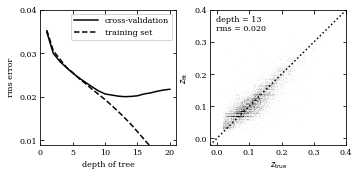

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from astroML.datasets import fetch_sdss_specgals

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Fetch data and prepare it for the computation
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 separate points
mag_test = mag[1::100]
z_test = z[1::100]

#------------------------------------------------------------
# Compute the cross-validation scores for several tree depths
depth = np.arange(1, 21)
rms_test = np.zeros(len(depth))
rms_train = np.zeros(len(depth))
i_best = 0
z_fit_best = None

for i, d in enumerate(depth):
    clf = DecisionTreeRegressor(max_depth=d, random_state=0)
    clf.fit(mag_train, z_train)

    z_fit_train = clf.predict(mag_train)
    z_fit = clf.predict(mag_test)
    rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
    rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))

    if rms_test[i] <= rms_test[i_best]:
        i_best = i
        z_fit_best = z_fit

best_depth = depth[i_best]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# first panel: cross-validation
ax = fig.add_subplot(121)
ax.plot(depth, rms_test, '-k', label='cross-validation')
ax.plot(depth, rms_train, '--k', label='training set')
ax.set_xlabel('depth of tree')
ax.set_ylabel('rms error')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.set_xlim(0, 21)
ax.set_ylim(0.009,  0.04)
ax.legend(loc=1)

# second panel: best-fit results
ax = fig.add_subplot(122)
edges = np.linspace(z_test.min(), z_test.max(), 101)
H, zs_bins, zp_bins = np.histogram2d(z_test, z_fit_best, bins=edges)
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto', 
           extent=[zs_bins[0], zs_bins[-1], zs_bins[0], zs_bins[-1]],
           cmap=plt.cm.binary)
ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.04, 0.96, "depth = %i\nrms = %.3f" % (best_depth, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm fit}$')

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

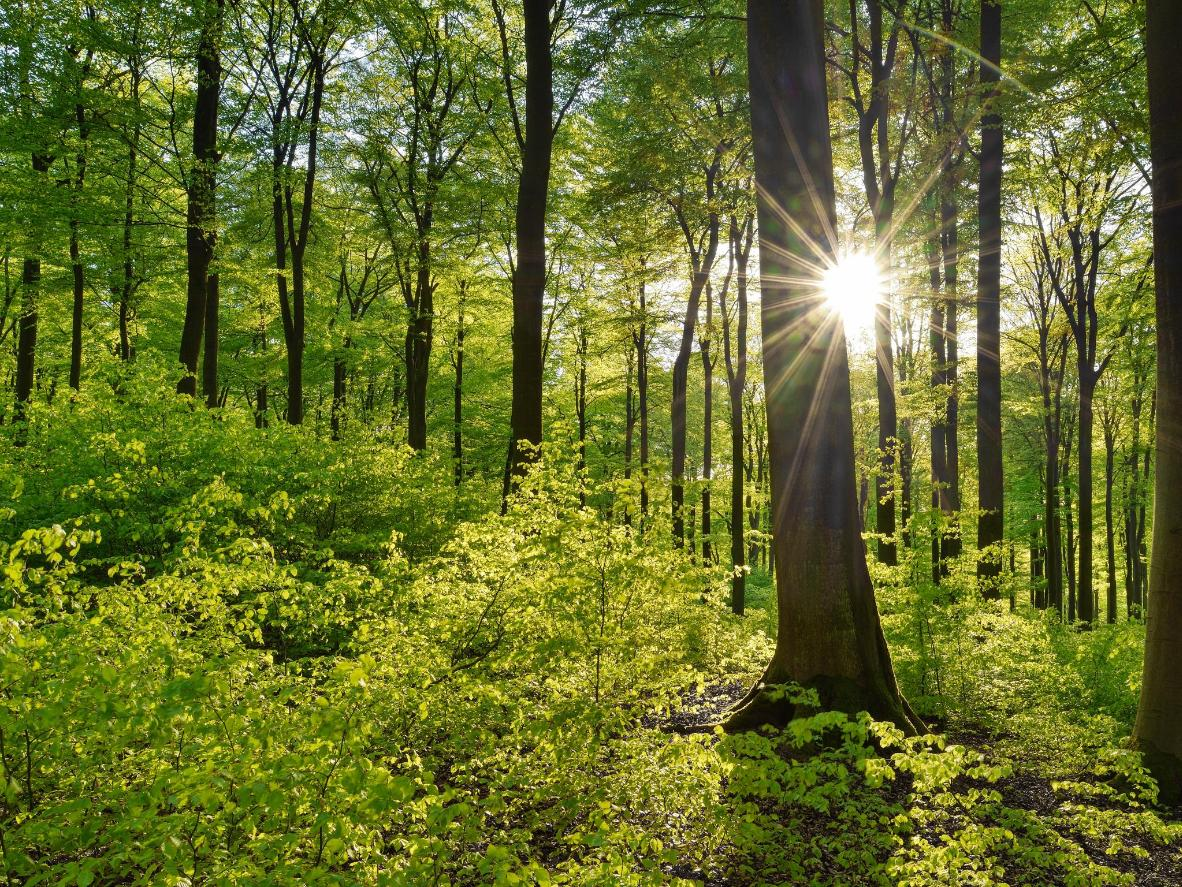

https://www.ted.com/talks/carole_cadwalladr_facebook_s_role_in_brexit_and_the_threat_to_democracy?utm_source=tedcomshare&utm_medium=email&utm_campaign=tedspread

## Bagging and Random Forests
Two of the most successful applications of ensemble learning (the idea of combining
the outputs of multiple models through some kind of voting or averaging) are those
of bagging and random forests. Bagging (from bootstrap aggregation) averages
the predictive results of a series of bootstrap samples from a training
set of data. Often applied to decision trees, bagging is applicable to regression
and many nonlinear model fitting or classification techniques. For a sample of
N points in a training set, bagging generates K equally sized bootstrap samples
from which to estimate the function $f_i(x)$. The final estimator, defined by bagging,
is then

$$f(x)=\frac{1}{K}=\sum_{i}^k f_i(x)$$

Random forests expand upon the bootstrap aspects of bagging by generating a set
of decision trees from these bootstrap samples. The features on which to generate
the tree are selected at random from the full set of features in the data. The final
classification from the random forest is based on the averaging of the classifications
of each of the individual decision trees. In so doing, random forests address two
limitations of decision trees: the overfitting of the data if the trees are inherently deep,
and the fact that axis-aligned partitioning of the data does not accurately reflect the
potentially correlated and/or nonlinear decision boundaries that exist within data
sets.

In generating a random forest we define n, the number of trees that we will
generate, and m, the number of attributes that we will consider splitting on at each
level of the tree. For each decision tree a subsample (bootstrap sample) of data is
selected from the full data set. At each node of the tree, a set of m variables are
randomly selected and the split criteria is evaluated for each of these attributes; a
different set of m attributes are used for each node. The classification is derived from
the mean or mode of the results from all of the trees. Keeping m small compared
to the number of features controls the complexity of the model and reduces the
concerns of overfitting.

Next Figure demonstrates the application of a random forest of regression trees
to photometric redshift data (using a forest of ten random trees). The left panel shows the cross-validation results as a function of
the depth of each tree. In comparison to the results for a single tree, the
use of randomized forests reduces the effect of overfitting and leads to a smaller rms
error.

Similar to the cross-validation technique used to arrive at the optimal depth of
the tree, cross-validation can also be used to determine the number of trees, n, and the
number of random features m, simply by optimizing over all free parameters. With random forests, n is typically increased until the cross-validation error plateaus, and
m is often chosen to be $\sim \sqrt( K)$ , where K is the number of attributes in the sample.





@pickle_results: computing results and saving to 'photoz_forest.pkl'


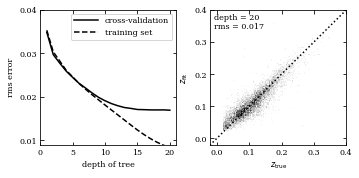

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from astroML.datasets import fetch_sdss_specgals
from astroML.utils.decorators import pickle_results

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 distinct points
mag_test = mag[1::100]
z_test = z[1::100]


#------------------------------------------------------------
# Compute the results
#  This is a long computation, so we'll save the results to a pickle.
@pickle_results('photoz_forest.pkl')
def compute_photoz_forest(depth):
    rms_test = np.zeros(len(depth))
    rms_train = np.zeros(len(depth))
    i_best = 0
    z_fit_best = None

    for i, d in enumerate(depth):
        clf = RandomForestRegressor(n_estimators=10,
                                    max_depth=d, random_state=0)
        clf.fit(mag_train, z_train)

        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
        rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best


depth = np.arange(1, 21)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(depth)
best_depth = depth[i_best]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(depth, rms_test, '-k', label='cross-validation')
ax.plot(depth, rms_train, '--k', label='training set')
ax.legend(loc=1)

ax.set_xlabel('depth of tree')
ax.set_ylabel('rms error')

ax.set_xlim(0, 21)
ax.set_ylim(0.009,  0.04)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

# right panel: plot best fit
ax = fig.add_subplot(122)

edges = np.linspace(z_test.min(), z_test.max(), 101)
H, zs_bins, zp_bins = np.histogram2d(z_test, z_fit_best, bins=edges)
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto', 
           extent=[zs_bins[0], zs_bins[-1], zs_bins[0], zs_bins[-1]],
           cmap=plt.cm.binary)

ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.03, 0.97, "depth = %i\nrms = %.3f" % (best_depth, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm fit}$')

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

## Boosting Classification
Boosting is an ensemble approach that was motivated by the idea that combining
many weak classifiers can result in an improved classification. This idea differs
fundamentally from that illustrated by random forests: rather than create the models
separately on different data sets, which can be done all in parallel, boosting creates
each new model to attempt to correct the errors of the ensemble so far. At the heart
of boosting is the idea that we reweight the data based on how incorrectly the data
were classified in the previous iteration.

In the context of classification (boosting is also applicable in regression) we can
run the classification multiple times and each time reweight the data based on the
previous performance of the classifier. At the end of this procedure we allow the
classifiers to vote on the final classification. The most popular form of boosting is
that of adaptive boosting. For this case, imagine that we had a weak classifier,
h(x), that we wish to apply to a data set and we want to create a strong classifier,
f (x), such that 

$$f(x)=\sum_{m}^{k} \theta_m h_m(x)$$

where m indicates the number of the iteration of the weak classifier and $\theta_m$ is the
weight of the m-th iteration of the classifier.
If we start with a set of data, x, with known classifications, y, we can assign
a weight, $w_m(x)$, to each point (where the initial weight is uniform, $1/N$, for the
N points in the sample). After the application of the weak classifier, $h_m (x)$, we can
estimate the classification error, $e_m$ , as

$$e_m=\sum_{i=1}^{N} w_m(x_i)I(h_m(x_i)\neq y_i)$$

where $I (h_m (x_i ) \neq y_i )$ is the indicator function (with $I (h_m (x_i ) \neq y_i )$ equal to 1 if $h_m (x_i ) \neq y_i$ and equal to 0 otherwise). From this error we define the weight of that iteration of the classifier as

$$\theta_m=\frac{1}{2}log(\frac{1-e_m}{e_m})$$

and update the weights on the points,

$$w_{m+1}=w_m exp(\theta_m)\ if\ h_m(x_i)=y_i\ and\\\ w_m exp(-\theta_m)\ if\ h_m(x_i) \neq y_i $$

The effect of updating $w(x_i)$ is to increase the weight of the misclassified data. After
K iterations the final classification is given by the weighted votes of each classifier. As the total error, $e_m$ , decreases, the weight of that iteration in the final classification increases.

A fundamental limitation of the boosted decision tree is the computation time for large data sets. Unlike random forests, which can be trivially parallelized, boosted decision trees rely on a chain of classifiers which are each dependent on the last. This may limit their usefulness on very large data sets. Other methods for boosting have been developed such as gradient boosting. Gradient boosting involves
approximating a steepest descent criterion after each simple evaluation, such that an additional weak classification can improve the classification score and may scale better to larger data sets.

Figure shows the results for a gradient-boosted decision tree for the SDSS photometric redshift data. For the weak estimator, we use a decision tree with a maximum depth of 3. The cross-validation results are shown as a function of boosting iteration. By 500 steps, the cross-validation error is beginning to level out, but there are still no signs of overfitting. The fact that the training error and cross-validation error remain very close indicates that a more complicated model (i.e., deeper trees or more boostings) would likely allow improved errors. Even so, the rms error
recovered with these suboptimal parameters is comparable to that of the random forest classifier.

@pickle_results: computing results and saving to 'photoz_boosting.pkl'


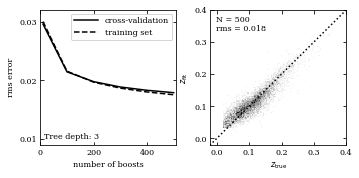

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from astroML.datasets import fetch_sdss_specgals
from astroML.utils.decorators import pickle_results


#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 distinct points
mag_test = mag[1::100]
z_test = z[1::100]


#------------------------------------------------------------
# Compute the results
#  This is a long computation, so we'll save the results to a pickle.
@pickle_results('photoz_boosting.pkl')
def compute_photoz_forest(N_boosts):
    rms_test = np.zeros(len(N_boosts))
    rms_train = np.zeros(len(N_boosts))
    i_best = 0
    z_fit_best = None

    for i, Nb in enumerate(N_boosts):
        try:
            # older versions of scikit-learn
            clf = GradientBoostingRegressor(n_estimators=Nb, learn_rate=0.1,
                                            max_depth=3, random_state=0)
        except TypeError:
            clf = GradientBoostingRegressor(n_estimators=Nb, learning_rate=0.1,
                                            max_depth=3, random_state=0)
        clf.fit(mag_train, z_train)

        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
        rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best

N_boosts = (10, 100, 200, 300, 400, 500)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(N_boosts)
best_N = N_boosts[i_best]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(N_boosts, rms_test, '-k', label='cross-validation')
ax.plot(N_boosts, rms_train, '--k', label='training set')
ax.legend(loc=1)

ax.set_xlabel('number of boosts')
ax.set_ylabel('rms error')
ax.set_xlim(0, 510)
ax.set_ylim(0.009,  0.032)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

ax.text(0.03, 0.03, "Tree depth: 3",
        ha='left', va='bottom', transform=ax.transAxes)

# right panel: plot best fit
ax = fig.add_subplot(122)
edges = np.linspace(z_test.min(), z_test.max(), 101)
H, zs_bins, zp_bins = np.histogram2d(z_test, z_fit_best, bins=edges)
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto', 
           extent=[zs_bins[0], zs_bins[-1], zs_bins[0], zs_bins[-1]],
           cmap=plt.cm.binary)

ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.04, 0.96, "N = %i\nrms = %.3f" % (best_N, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm fit}$')

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

# Evaluating Classifiers: ROC Curves
Comparing the performance of classifiers is an important part of choosing the best
classifier for a given task. “Best” in this case can be highly subjective: for some problems, one might wish for high completeness at the expense of contamination; at other times, one might wish to minimize contamination at the expense of
completeness. One way to visualize this is to plot receiver operating characteristic
(ROC) curves . An ROC curve usually shows the true-positive rate as a function of the false-positive rate as the discriminant function is varied. How the function is varied depends on the model: in the example of Gaussian naive Bayes, the curve is drawn by classifying data using relative probabilities between 0 and 1.

A set of ROC curves for a selection of classifiers explored in this chapter is shown
in the left panel of next figure. The curves closest to the upper left of the plot are the
best classifiers: for the RR Lyrae data set, the ROC curve indicates that GMM Bayes
and K -nearest-neighbor classification outperform the rest. For such an unbalanced
data set, however, ROC curves can be misleading. Because there are fewer than five sources for every 1000 background objects, a false-positive rate of even 0.05 means that false positives outnumber true positives ten to one! When sources are rare, it is often more informative to plot the efficiency (equal to one minus the contamination) vs. the completeness.

 This can give a better idea of how well a
classifier is recovering rare data from the background. The right panel of figure  shows the completeness vs. efficiency for the same
set of classifiers. A striking feature is that the simpler classifiers reach a maximum
efficiency of about 0.25: this means that at their best, only 25% of objects identified
as RR Lyrae are actual RR Lyrae. By the completeness–efficiency measure, the GMM
Bayes model outperforms all others, allowing for higher completeness at virtually any
efficiency level. We stress that this is not a general result, and that the best classifier
for any task depends on the precise nature of the data.

GaussianNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
GMMBayes


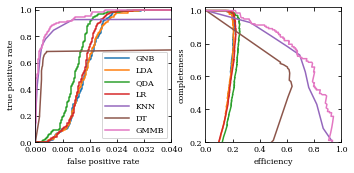

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from astroML.classification import GMMBayes

from sklearn.metrics import roc_curve

from astroML.utils import split_samples, completeness_contamination
from astroML.datasets import fetch_rrlyrae_combined

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
y = y.astype(int)
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)


#------------------------------------------------------------
# Fit all the models to the training data
def compute_models(*args):
    names = []
    probs = []
    for classifier, kwargs in args:
        print(classifier.__name__)
        clf = classifier(**kwargs)
        clf.fit(X_train, y_train)
        y_probs = clf.predict_proba(X_test)[:, 1]

        names.append(classifier.__name__)
        probs.append(y_probs)

    return names, probs


names, probs = compute_models((GaussianNB, {}),
                              (LinearDiscriminantAnalysis, {}),
                              (QuadraticDiscriminantAnalysis, {}),
                              (LogisticRegression,
                               dict(class_weight='balanced')),
                              (KNeighborsClassifier,
                               dict(n_neighbors=10)),
                              (DecisionTreeClassifier,
                               dict(random_state=0, max_depth=12,
                                    criterion='entropy')),
                              (GMMBayes, dict(n_components=3, tol=1E-5,
                                              covariance_type='full')))

#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)


# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)

labels = dict(GaussianNB='GNB',
              LinearDiscriminantAnalysis='LDA',
              QuadraticDiscriminantAnalysis='QDA',
              KNeighborsClassifier='KNN',
              DecisionTreeClassifier='DT',
              GMMBayes='GMMB',
              LogisticRegression='LR')

thresholds = np.linspace(0, 1, 1001)[:-1]

# iterate through and show results
for name, y_prob in zip(names, probs):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=labels[name])

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=labels[name])

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0.2, 1.02)

plt.show()

As an example where the ROC curve is a more useful diagnostic, next figure
shows ROC curves for the classification of stars and quasars from four-color photometry. The stars and quasars in his sample are selected with differing selection functions: for this reason, the dataset does not reflect a realistic sample. We use it for purposes of illustration only. The stars outnumber the quasars by only a factor of 3, meaning that a false-positive rate of 0.3 corresponds to a contamination of ∼50%.

 Here we see that the best-performing
classifiers are the neighbors-based and tree-based classifiers, both of which approach
100% true positives with a very small number of false positives. An interesting feature
is that classifiers with linear discriminant functions (LDA and logistic regression)
plateau at a true-positive rate of 0.9. These simple classifiers, while useful in some
situations, do not adequately explain these photometric data.

downloading DR7 quasar dataset from http://das.sdss.org/va/qsocat/dr7qso.dat.gz to /root/astroML_data

GaussianNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
GMMBayes


/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


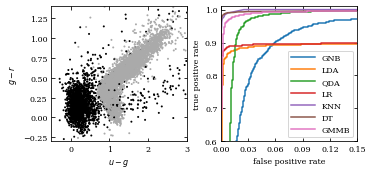

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils import split_samples

from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from astroML.classification import GMMBayes


#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Fetch data and split into training and test samples
from astroML.datasets import fetch_dr7_quasar
from astroML.datasets import fetch_sdss_sspp

quasars = fetch_dr7_quasar()
stars = fetch_sdss_sspp()

# Truncate data for speed
quasars = quasars[::5]
stars = stars[::5]

# stack colors into matrix X
Nqso = len(quasars)
Nstars = len(stars)
X = np.empty((Nqso + Nstars, 4), dtype=float)

X[:Nqso, 0] = quasars['mag_u'] - quasars['mag_g']
X[:Nqso, 1] = quasars['mag_g'] - quasars['mag_r']
X[:Nqso, 2] = quasars['mag_r'] - quasars['mag_i']
X[:Nqso, 3] = quasars['mag_i'] - quasars['mag_z']

X[Nqso:, 0] = stars['upsf'] - stars['gpsf']
X[Nqso:, 1] = stars['gpsf'] - stars['rpsf']
X[Nqso:, 2] = stars['rpsf'] - stars['ipsf']
X[Nqso:, 3] = stars['ipsf'] - stars['zpsf']

y = np.zeros(Nqso + Nstars, dtype=int)
y[:Nqso] = 1

# split into training and test sets
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.9, 0.1],
                                                     random_state=0)


#------------------------------------------------------------
# Compute fits for all the classifiers
def compute_results(*args):
    names = []
    probs = []

    for classifier, kwargs in args:
        print(classifier.__name__)
        model = classifier(**kwargs)
        model.fit(X, y)
        y_prob = model.predict_proba(X_test)

        names.append(classifier.__name__)
        probs.append(y_prob[:, 1])

    return names, probs

LRclass_weight = dict([(i, np.sum(y_train == i)) for i in (0, 1)])

names, probs = compute_results((GaussianNB, {}),
                               (LinearDiscriminantAnalysis, {}),
                               (QuadraticDiscriminantAnalysis, {}),
                               (LogisticRegression,
                                dict(class_weight=LRclass_weight)),
                               (KNeighborsClassifier,
                                dict(n_neighbors=10)),
                               (DecisionTreeClassifier,
                                dict(random_state=0, max_depth=12,
                                     criterion='entropy')),
                               (GMMBayes, dict(n_components=3, tol=1E-5,
                                               covariance_type='full')))

#------------------------------------------------------------
# Plot results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# First axis shows the data
ax1 = fig.add_subplot(121)
im = ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=4,
                 linewidths=0, edgecolors='none',
                 cmap=plt.cm.binary)
im.set_clim(-0.5, 1)
ax1.set_xlim(-0.5, 3.0)
ax1.set_ylim(-0.3, 1.4)
ax1.set_xlabel('$u - g$')
ax1.set_ylabel('$g - r$')

labels = dict(GaussianNB='GNB',
              LinearDiscriminantAnalysis='LDA',
              QuadraticDiscriminantAnalysis='QDA',
              KNeighborsClassifier='KNN',
              DecisionTreeClassifier='DT',
              GMMBayes='GMMB',
              LogisticRegression='LR')

# Second axis shows the ROC curves
ax2 = fig.add_subplot(122)
for name, y_prob in zip(names, probs):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax2.plot(fpr, tpr, label=labels[name])

ax2.legend(loc=4)
ax2.set_xlabel('false positive rate')
ax2.set_ylabel('true positive rate')
ax2.set_xlim(0, 0.15)
ax2.set_ylim(0.6, 1.01)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.show()

# Which Classifier Should I Use?
Continuing as we have in previous chapters, we will answer this question by
decomposing the notion of “best” along the axes of “accuracy,” “interpretability,”
“simplicity,” and “speed.”

- What are the most accurate classifiers? A bit of thought will lead to the obvious
conclusion that no single type of model can be known in advance to be the best
classifier for all possible data sets, as each data set can have an arbitrarily different
underlying distribution. This is famously formalized in the no free lunch theorem. 

The conclusion is even more obvious for regression, where the same theorem
applies, though it was popularized in the context of classification. However, we can
still draw upon a few useful rules of thumb.

As we have said in the summaries of earlier chapters, in general, the more
parameters a model has, the more complex a function it can fit (whether that
be the probability density functions, in the case of a generative classifier, or the
decision boundary, in the case of a discriminative classifier), and thus the more
likely it is to yield high predictive accuracy. Parametric methods, which have a
fixed number of parameters with respect to the number of data points N, include
(roughly in increasing order of typical accuracy) naive Bayes, linear discriminant analysis, logistic regression, linear support vector machines, quadratic discriminant
analysis, and linear ensembles of linear models. Nonparametric methods, which have
a number of parameters that grows as the number of data points N grows, include
(roughly in order of typical accuracy) decision trees, K -nearest-neighbor, neural
networks, kernel discriminant analysis, kernelized support vector machines, random
forests, and boosting with nonlinear methods (a model like K -nearest-neighbor for
this purpose is considered to have O(N) parameters, as the model consists of the
training points themselves—however, there is only one parameter, K , that in practice
is optimized through cross-validation). While there is no way to know for sure which
method is best for a given data set until it is tried empirically, generally speaking the
most accurate method is most likely to be nonparametric.

Some models including neural networks and GMM Bayes classifiers are para-
metric for a fixed number of hidden units or components, but if that number is
chosen in a way that can grow with N, such a model becomes nonparametric. The
practical complication of trying every possible number of parameters typically pre-
vents a disciplined approach to model selection, making such approaches difficult to
call either nonparametric or strictly parametric. Among the nonparametric methods,
the ensemble methods (e.g., bagging, boosting) are effectively models with many
more parameters, as they combine hundreds or thousands of base models. Thus, as
we might expect based on our general rule of thumb, an ensemble of models will
generally yield the highest possible accuracy.

The generally simpler parametric methods can shine in some circumstances,
however. When the dimensionality is very high compared to the number of data
points (as is typical in text data where for each document the features are the counts
of each of thousands of words, or in bioinformatics data where for each patient
the features are the expression levels of each of thousands of genes), the points
in such a space are effectively so dispersed that a linear hyperplane can (at least
mostly) separate them. Linear classifiers have thus found great popularity in such
applications, though this situation is fairly atypical in astronomy problems. Another
setting that favors parametric methods is that of low sample size. When there are
few data points, a simple function is all that is needed to achieve a good fit, and the
principle of Occam’s razor  dictates favoring the simplest model that works.

In such a regime, the paucity of data points makes the ability of domain knowledge-
based assumptions to fill in the gaps compelling, leading one toward Bayesian
approaches and carefully hand-constructed parametric models rather than relatively
“blind,” or assumption-free nonparametric methods. Hierarchical modeling, as
possibly assisted by the formalism of Bayesian networks, becomes the mode of
thinking in this regime.

Complexity control in the form of model selection is more critical for non-
parametric methods—it is important to remember that the accuracy benefits of such
methods are only realized assuming that model selection is done properly, via cross-
validation or other measures (in order to avoid being misled by overly optimistic-
looking accuracies). Direct comparisons between different ML methods, which are
most common in the context of classification, can also be misleading when the
amount of human and/or computational effort spent on obtaining the best parameter
settings was not equal between methods. This is typically the case, for example, in a
paper proposing one method over others.

- What are the most interpretable classifiers? In many cases we would like to know
why the classifier made the decision it did, or in general, what sort of discriminatory
pattern the classifier has found in general, for example, which dimensions are the
primary determinants of the final prediction. In general, this is where parametric
methods tend to be the most useful. Though it is certainly possible to make a complex
and unintelligible parametric model, for example by using the powerful general
machinery of graphical models, the most popular parametric methods tend to be
simple and easy to reason about. In particular, in a linear model, the coefficients on
the dimensions can be interpreted to indicate the importance of each variable in the
model.

Nonparametric methods are often too large to be interpretable, as they typically
scale in size (number of parameters) with the number of data points. However,
among nonparametric methods, certain ones can be intepretable, in different senses.
A decision tree can be explained in plain English terms, by reading paths from
the root to each leaf as a rule containing if-then tests on the variables (see, e.g.,
figure 9.12). The interpretability of decision trees was used to advantage in un-
derstanding star–galaxy classification. A nearest-neighbor classifier’s decisions
can be understood by simply examining the k neighbors returned, and their class
labels. A probabilistic classifier which explicitly implements Bayes’ rule, such as
kernel discriminant analysis, can be explained in terms of the class under which
the test point was more likely—an explanation that is typically natural for physicists
in particular. Neural networks, kernelized support vector machines, and ensembles
such as random forests and boosting are among the least interpretable methods.

- What are the most scalable classifiers? Naive Bayes and its variants are by far the
easiest to compute, requiring in principle only one pass through the data. Learning
a logistic regression model via standard unconstrained optimization methods such
as conjugate gradient requires only a modest number of relatively cheap iterations
through the data. Though the model is still linear, linear support vector machines
are more expensive, though several fast algorithms exist. We have discussed K -
nearest-neighbor computations, but K -nearest-neighbor classification is
in fact a slightly easier problem, and this can be exploited algorithmically. Kernel
discriminant analysis can also be sped up by fast tree-based algorithms, reducing
its cost from O$(N^2)$ to O(N). Decision trees are relatively efficient, requiring
O(N log N) time to build and O(log N) time to classify, as are neural networks.
Random forests and boosting with trees simply multiplies the cost of decision
trees by the number of trees, which is typically very large, but this can be easily
parallelized. Kernelized support vector machines are O$(N^3)$ in the worst case, and
have resisted attempts at appreciably fast algorithms. Note that the need to use fast
algorithms ultimately counts against a method in terms of its simplicity, at least in
implementation.

- What are the simplest classifiers? Naive Bayes classifiers are possibly the simplest
in terms of both implementation and learning, requiring no tuning parameters
to be tried. Logistic regression and decision tree are fairly simple to implement,
with no tuning parameters. K -nearest-neighbor classification and KDA are simple
methods that have only one critical parameter, and cross-validation over it is
generally straightforward. Kernelized support vector machines also have only one
or two critical parameters which are easy to cross-validate over, though the method
is not as simple to understand as KNN or KDA. Mixture Bayes classifiers inherit
the properties of Gaussian mixtures  (i.e., they are fiddly). Neural
networks are perhaps the most fiddly methods. The onus of having to store and
manage the typically hundreds or thousands of trees in random forests counts against
it, though it is conceptually simple.

- Other considerations, and taste. If obtaining good class probability estimates rather
than just the correct class labels is of importance, KDA is a good choice as it
is based on the most powerful approach for density estimation, kernel density
estimation. For this reason, as well as its state-of-the-art accuracy and ability to be
computed efficiently, once a fast KDA algorithm had been developed, it
produced a dramatic leap in the size and quality of quasar catalogs, and
associated scientific results. Optimization-based approaches, such as logistic
regression, can typically be augmented to handle missing values, whereas distance-
based methods such as K -nearest-neighbor, kernelized SVMs, and KDA cannot.
When both continuous and discrete attributes are present, decision trees are one of
the few methods that seamlessly handles both without modification.

- Simple summary. Using our axes of “accuracy,” “interpretability,” “simplicity,” and
“speed,” a summary of each of the methods considered in this chapter, in terms of
high (H), medium (M), and low (L) is given in table (*Read the book and sklearn Documentation*). See also https://dash.plotly.com/

Note that it is hard to say in advance how a method will behave in terms of
accuracy, for example, on a particular data set—and no method, in general, always
beats other methods. Thus our table should be considered an initial guideline based
on extensive experience.

In [ ]:
!pip install astroML

     |████████████████████████████████| 112kB 5.7MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=558b3b2e8145b7ddc85eff75832bb2555a18cb44ba415ceb32eebff4302eeb08
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML
